In [1]:
import pymongo as pm
import numpy as np

port = 24444
host = 'localhost'
connection = pm.MongoClient(port = port,host = host)

In [2]:
print(connection.database_names())[-4:]

[u'imagenet', u'local', u'tfutils-test']


In [3]:
database = connection['imagenet']

In [4]:
database.collection_names()

[u'alexnet.files', u'alexnet.chunks']

In [5]:
collection = database['alexnet.files']
print(collection)
collection.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'imagenet'), u'alexnet.files')


[u'experiment_1']

In [6]:
exp1 = collection.distinct('exp_id')

In [7]:
print(exp1)

[u'experiment_1']


In [8]:
print(collection)

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'imagenet'), u'alexnet.files')


In [10]:
query = {'exp_id': 'experiment_1'}
entries = collection.find(query)
print(entries.count())

1


In [11]:
entries[0]

{u'_id': ObjectId('59d42d671742f961665e20a4'),
 u'_saver_num_data_files': 1,
 u'_saver_write_version': 2,
 u'chunkSize': 261120,
 u'duration': 90.41816592216492,
 u'exp_id': u'experiment_1',
 u'filename': u'/home/mrowca/.tfutils/35.203.151.24:24444/imagenet/alexnet/experiment_1/checkpoint-440003.tar',
 u'length': 912128000,
 u'md5': u'a9f43e00f2e5abd206350ab85d71a307',
 u'params': {u'dont_run': False,
  u'inter_op_parallelism_threads': 40,
  u'learning_rate_params': {u'boundaries': [150000, 300000, 450000],
   u'func': {u'active_branch': u'master',
    u'active_branch_in_origin': True,
    u'clean': True,
    u'commit': u'53568fdf1a76c6fdcbb7241574700e0a35659351',
    u'commit_in_log': True,
    u'git_dir': u'/home/mrowca/workspace/cs375-private/.git',
    u'modname': u'__main__',
    u'objname': u'<lambda>',
    u'remote_urls': [u'https://github.com/neuroailab/cs375-private.git'],
    u'source_path': u'copy_imagenet.py'},
   u'values': [0.01, 0.005, 0.001, 0.0005]},
  u'load_params': 

In [16]:
query_train = {'exp_id': 'experiment_1', 'train_results': {'$exists' : True}}
train_entries = collection.find(query_train)
print(train_entries[0])

{u'saved_filters': True, u'_saver_write_version': 2, u'chunkSize': 261120, u'filename': u'/home/mrowca/.tfutils/35.203.151.24:24444/imagenet/alexnet/experiment_1/checkpoint-440003.tar', u'_saver_num_data_files': 1, u'train_results': [{u'loss': 1.0932353734970093, u'learning_rate': 0.0010000000474974513}], u'duration': 90.41816592216492, u'length': 912128000, u'params': {u'model_params': {u'num_gpus': 1, u'devices': [u'/gpu:0'], u'prefix': u'model_0', u'train': True, u'func': {u'modname': u'models', u'remote_urls': [u'https://github.com/neuroailab/cs375-private.git'], u'commit_in_log': True, u'source_path': u'/home/mrowca/workspace/cs375-private/2017/assignment1-solution/models.py', u'active_branch_in_origin': True, u'git_dir': u'/home/mrowca/workspace/cs375-private/.git', u'objname': u'alexnet_model', u'clean': True, u'active_branch': u'master', u'commit': u'53568fdf1a76c6fdcbb7241574700e0a35659351'}, u'cfg_final': {u'model_0/conv4': {u'conv': {u'activation': u'relu', u'padding': u'SAM

In [18]:
query_train = {'exp_id': 'experiment_1', 'train_results': {'$exists' : True}}
train_entries = collection.find(query_train, projection = ['train_results'])
print(train_entries[0])

{u'train_results': [{u'loss': 1.0932353734970093, u'learning_rate': 0.0010000000474974513}], u'_id': ObjectId('59d42d671742f961665e20a4')}


In [19]:
loss = np.array([results['loss'] for entry in train_entries for results in entry['train_results']])

In [20]:
print(loss)

[ 1.09323537]


In [22]:
entry_1 = {'value': 10.1}
coll = collection['test_db']['test_coll']
# to insert
coll.insert_one(entry_1)
coll.find({'value':{'$exists' : True}})[0]

{u'_id': ObjectId('59dc11b9d4fdab0e0ca97a77'), u'value': 10.1}

In [26]:
x = np.linspace(-2,2,101)[np.random.RandomState(0).permutation(101)]
y = x ** 3 -1

print(x)
print(y)

[-0.96  1.44 -1.92  0.2   1.    1.76 -1.36  0.92  0.16  1.84  0.12  1.72
  1.12 -1.48 -1.72 -0.8  -1.12 -1.04 -0.68 -1.68 -0.28  0.48 -1.88  0.84
 -0.2  -0.08 -1.76  2.    1.28  1.04  0.4   1.2   1.64  0.72  0.04 -0.92
 -1.28  0.24  0.52  0.96 -1.96  0.44 -0.32 -0.36 -1.84 -1.4  -1.32 -0.4
 -0.48 -1.8   1.68  0.36 -2.   -0.64 -0.88  0.   -1.56 -0.6  -1.08  0.08
 -1.6  -0.76  0.64  0.28  1.16  1.4  -0.72  1.36 -1.44  1.6  -1.24 -0.84
 -0.04  1.92  1.96  0.76 -1.2   1.8   0.88  1.08 -1.   -0.52  1.24 -0.16
 -0.44  0.6   0.32 -1.52  1.56  1.52  0.8   1.48 -0.56 -1.16  1.32 -1.64
  1.88  0.68  0.56 -0.12 -0.24]
[-1.884736  1.985984 -8.077888 -0.992     0.        4.451776 -3.515456
 -0.221312 -0.995904  5.229504 -0.998272  4.088448  0.404928 -4.241792
 -6.088448 -1.512    -2.404928 -2.124864 -1.314432 -5.741632 -1.021952
 -0.889408 -7.644672 -0.407296 -1.008    -1.000512 -6.451776  7.        1.097152
  0.124864 -0.936     0.728     3.410944 -0.626752 -0.999936 -1.778688
 -3.097152 -0.986176

In [28]:

database = connection['task']
coll = database['polyfunction']

l = []
for i,j in zip(x,y):
    coll.insert_one({'x':i,'y':j})

In [103]:
list(coll.find(projection=['x']).sort([('x',pm.ASCENDING),('y',pm.DESCENDING)]))

[{u'_id': ObjectId('59dc138cd4fdab0e0ca97b05'), u'x': -1.96},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97adf'), u'x': -1.92},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97af3'), u'x': -1.88},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b09'), u'x': -1.84},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b0e'), u'x': -1.8},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97af7'), u'x': -1.76},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97aeb'), u'x': -1.72},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97af0'), u'x': -1.68},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b3c'), u'x': -1.6400000000000001},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b19'), u'x': -1.6},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b15'), u'x': -1.56},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b34'), u'x': -1.52},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97aea'), u'x': -1.48},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b21'), u'x': -1.44},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97b0a'), u'x': -1.4},
 {u'_id': ObjectId('59dc138cd4fdab0e0ca97ae3'), u'x': -1.35

In [118]:


sortX = list(coll.find(projection=['x','y']))
x = [entry['x'] for entry in sortX]
y = [entry['y'] for entry in sortX]

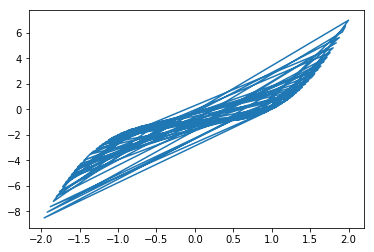

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymongo as pm
plt.plot(x,y)

In [102]:
coll.delete_one({'x':-2.0})

In [105]:
connection['task'].drop_collection['polyfunction']
connection.drop_database['task']



TypeError: 'instancemethod' object has no attribute '__getitem__'

In [108]:
connection['task']

Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'task')

In [114]:
print(y)

[-9.0, -8.529536, -8.077887999999998, -7.644671999999999, -7.229504, -6.832000000000001, -6.451776, -6.088448, -5.741631999999999, -5.410944000000001, -5.096000000000001, -4.796416000000001, -4.511808, -4.241792, -3.9859839999999997, -3.7439999999999993, -3.5154559999999995, -3.2999679999999993, -3.0971520000000003, -2.906624, -2.7279999999999998, -2.5608960000000005, -2.4049280000000004, -2.2597120000000004, -2.124864, -2.0, -1.8847359999999997, -1.7786879999999998, -1.6814719999999999, -1.5927040000000001, -1.512, -1.438976, -1.373248, -1.314432, -1.262144, -1.2159999999999997, -1.175616, -1.140608, -1.110592, -1.085184, -1.064, -1.046656, -1.032768, -1.021952, -1.013824, -1.008, -1.004096, -1.001728, -1.000512, -1.000064, -1.0, -0.999936, -0.999488, -0.998272, -0.995904, -0.992, -0.9861759999999999, -0.9780479999999999, -0.9672320000000001, -0.9533440000000001, -0.936, -0.9148160000000001, -0.889408, -0.8593919999999999, -0.824384, -0.7839999999999999, -0.7378559999999998, -0.685567

In [121]:
import tensorflow as tf
import numpy as np

# placeholder
input_placeholder = tf.placeholder(tf.float32,shape =[None,3])
# trainable variables arndomly initialized
W1 = tf.Variable(tf.random_normal(shape=[3,20]), tf.float32)
b1 = tf.Variable(tf.random_normal(shape=[20,]), tf.float32)
W2 = tf.Variable(tf.random_normal(shape=[20,3]), tf.float32)
b2 = tf.Variable(tf.random_normal(shape=[3,]), tf.float32)
# hidden layer
h = tf.nn.sigmoid(tf.matmul(input_placeholder, W1) + b1)
# output
out = tf.matmul(h,W2) + b2

In [122]:
print(out)

Tensor("add_2:0", shape=(?, 3), dtype=float32)
